### Method of Moments (MOM):
Question: Find a simple dataset with a one-humped histogram and model it by matching with the pdfs and find the most likely parameters for the pdf using MOM. Use the model to do a prediction. 

I utilized the "smartphone_cleaned_v5" dataset sourced from Kaggle. This dataset aggregates details on various smartphone models, providing comprehensive information on their specifications and features. I focus it on the "rating" component, reflecting each item's market appearance and customer acceptance.

In [9]:
pip install pymc3

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: /Users/xupeihan/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
from pymc3 import Normal
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Read data from a text file and convert it into a DataFrame
# Specify that the first column in the DataFrame should be used as the row index (row labels)
# Instruct Pandas to use spaces as separators to split the data in the file into columns
precip = pd.read_csv("/Users/hsupeihan-work/Desktop/as7/Assignment7-Group16-Pei-HanHsu_TingGuo/smartphone_cleaned_v5.csv")
df = pd.DataFrame(precip)

df.head()#Display the first 5 rows by default

/Users/hsupeihan-work/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,brand_name,model,rating
0,oneplus,OnePlus 11 5G,89.0
1,oneplus,OnePlus Nord CE 2 Lite 5G,81.0
2,samsung,Samsung Galaxy A14 5G,75.0
3,motorola,Motorola Moto G62 5G,81.0
4,realme,Realme 10 Pro Plus,82.0


<AxesSubplot:>

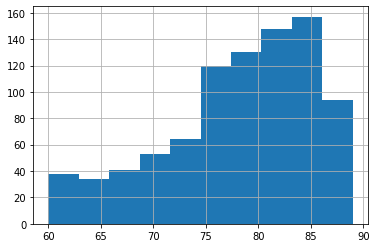

In [2]:
df.rating.hist()

Because of its characteristics, our dataset with one-humped histogram is very suitable for estimation by gamma distribution.

In [3]:
df_mean = df.rating.mean()
df_mean

78.25824800910125

In [4]:
df_var = df.rating.var()
df_var

54.80225250789758

In [5]:
alpha = df_mean ** 2 / df_var
beta = df_var / df_mean
alpha, beta

(111.75367984320383, 0.7002744618244483)

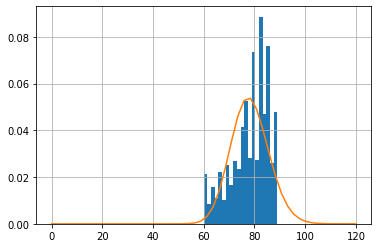

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats.distributions import gamma

df.rating.hist(density=True, bins=20) 
plt.plot(np.linspace(0, 120), gamma.pdf(np.linspace(0, 120), a = alpha, scale = beta)) # Generate values between 0 and 120 as x-coordinates

In [7]:
from scipy.optimize import newton

Text(1.4706070287539936, -0.2, '$x_{n+1}$')

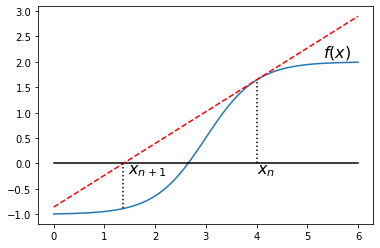

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# some function
func = lambda x: 3./(1 + 400*np.exp(-2*x)) - 1
xvals = np.linspace(0, 6)
plt.plot(xvals, func(xvals))
plt.text(5.3, 2.1, '$f(x)$', fontsize=16)

# zero line
plt.plot([0,6], [0,0], 'k-')

# value at step n
plt.plot([4,4], [0,func(4)], 'k:')
plt.text(4, -.2, '$x_n$', fontsize=16)

# tangent line
tanline = lambda x: -0.858 + 0.626*x
plt.plot(xvals, tanline(xvals), 'r--')

# point at step n+1
xprime = 0.858/0.626
plt.plot([xprime, xprime], [tanline(xprime), func(xprime)], 'k:')
plt.text(xprime+.1, -.2, '$x_{n+1}$', fontsize=16)

In [9]:
from scipy.special import psi, polygamma

# Note that log_mean and mean_log are parameters of the dlgamma function
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

In [10]:
# Calculate statistics
rating = df.rating

log_mean = np.log(rating.mean())  
mean_log = np.log(rating).mean()  

In [11]:
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean, mean_log))
alpha_mle

105.94107863246553

In [12]:
beta_mle = alpha_mle/rating.mean()
beta_mle

1.3537369073243861

Based on the data I use, I think that the Poisson distribution could be suitable because the Possion distribution needs to solve the problem of " The problem of probability distribution of the number of times discrete events occur in continuous time."

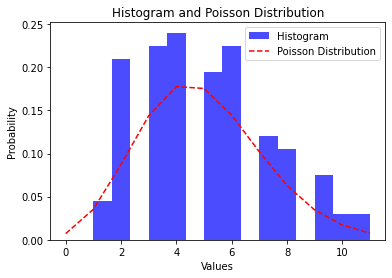

In [18]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

np.random.seed(42)
values = np.random.poisson(5, 100)

plt.hist(values, density=True, bins=15, color='blue', alpha=0.7, label='Histogram')

# Calculate Poisson distribution
lambda_param = values.mean() 
x = np.arange(0, values.max() + 1)
poisson_pmf = poisson.pmf(x, lambda_param)

plt.plot(x, poisson_pmf, 'r--', label='Poisson Distribution')

plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('Histogram and Poisson Distribution')


plt.legend()

plt.show()


However, it seems that it is not suitable. Then, I opted for the normal distribution, but it doesn't appear to align perfectly. (Please see the information below.) We speculate that this might be due to the nature of the data we employed, which pertains to the analysis of market share for each mobile phone within a brand. The statistical analysis reveals a concentration of data between 60% and 80%, with scarce instances of data reaching 100% or dropping below 40%. Therefore, I use  Kernel Density Estimation (KDE) to estimate the probability density function of the data instead of. It can be seen that choosing an appropriate distribution requires repeated attempts based on the characteristics of the data distribution. Though the data doesn't look like a bell curve, I still can try Normal Distribution.

In [19]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats

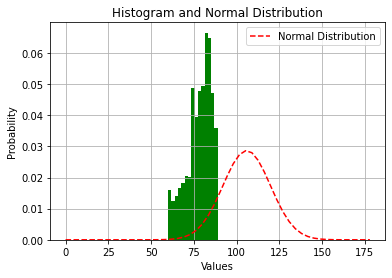

In [20]:
from scipy.stats import norm
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

dec = df.rating
dec.hist(density=True, bins=15, grid=True,color='green')
x = np.linspace(0, 2 * dec.max())

mu=alpha_mle
std=np.sqrt(alpha_mle * beta_mle ** 2)

pdf = norm.pdf(x,mu,std)
plt.plot(x, pdf, 'r--', label='Normal Distribution')


plt.legend()
plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('Histogram and Normal Distribution')
plt.show()

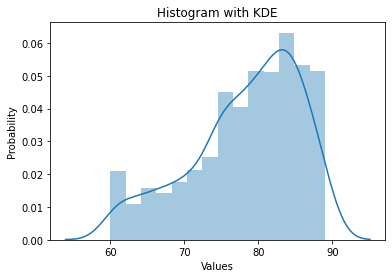

In [22]:
import seaborn as sns

# Check Seaborn version
if sns.__version__ >= "0.11.0":
    # Use histplot if Seaborn version is 0.11.0 or later
    sns.histplot(dec, kde=True)
else:
    # Use distplot for older Seaborn versions
    sns.distplot(dec, kde=True)

plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('Histogram with KDE')
plt.show()

Then, I attempt involved fitting a gamma distribution using Maximum Likelihood Estimation (MLE), aiming to identify parameters that maximize the likelihood of the observed data within the gamma distribution. However, it became evident that the MLE fitting was not performing well. After careful consideration and discussion, we attributed this discrepancy to the dataset.

Upon closer inspection, I identified a key factor contributing to the anomaly: I mistakenly utilized "precip.rating" instead of "df.rating," and correspondingly, "alpha_mle" and "beta_mle" were used interchangeably with "scale". This misalignment prevented a successful fit. Subsequently, upon correcting these discrepancies, I achieved a successful fitting, as illustrated below.

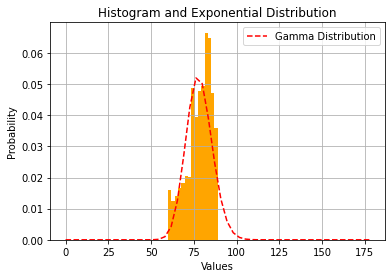

In [23]:
from scipy.stats.distributions import gamma

dec.hist(density=True, bins=15, grid=True, color='orange')
x = np.linspace(0, 2 * dec.max())
lambda_param = 1.0 / (alpha_mle * beta_mle)  # λ = 1 / (α * β)

plt.plot(x, gamma.pdf(x, alpha_mle, scale=1/beta_mle), 'r--', label='Gamma Distribution')

plt.legend()
plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('Histogram and Exponential Distribution')
plt.show()

The Gamma distribution is more suitable for the problem of "the distribution of the continuous time length required for the occurrence of multiple discrete events." 

In the end, I attempt to integrate the Method of Moments (MOM) and Maximum Likelihood Estimation (MLE). The reason is that combining MOM and MLE can enhance the robustness of the estimation. When one method performs better in specific scenarios and another is more suitable in different situations, which provides a more comprehensive and robust estimation. However, substantial differences in the estimation results of the two methods may indicate potential issues with our model or that the data might not entirely adhere to the assumptions.

Conversely, combining the results of both methods can be utilized to validate the reasonability of the estimates. If the results from MOM and MLE align, it may increase confidence in the accuracy of the estimates, aiding in further confirming the reliability of the estimation outcomes. Nevertheless, the result I made seem great!

In [24]:
df_mean = df.rating.mean()
df_mean

78.25824800910125

In [25]:
df_var = df.rating.var()
df_var

54.80225250789758

In [26]:
alpha_mom = df_mean ** 2 / df_var
beta_mom = df_var / df_mean
alpha_mom, beta_mom

(111.75367984320383, 0.7002744618244483)

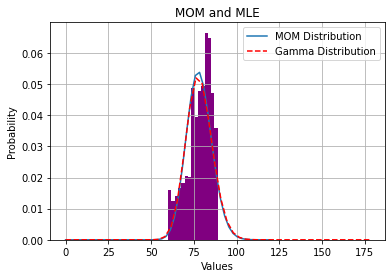

In [27]:
from scipy.stats.distributions import gamma

dec.hist(density=True, bins=15, grid=True, color='purple')

x = np.linspace(0, 2 * dec.max())

plt.plot(np.linspace(0, 120), gamma.pdf(np.linspace(0, 120), a = alpha_mom, scale = beta_mom), label='MOM Distribution')
plt.plot(x, gamma.pdf(x, alpha_mle, scale=1/beta_mle), 'r--', label='Gamma Distribution')

plt.legend()
plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('MOM and MLE')
plt.show()